In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-dataset/WineQT.csv


**Step 1: Select a real-world dataset**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/kaggle/input/wine-quality-dataset/WineQT.csv")  # Load dataset

In [4]:
df.head()  # Display first 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


**Step 2: Perform data preparation & cleaning**

In [5]:
df.shape  # Shape of dataset (rows, cols)

(1143, 13)

In [6]:
df.info()  # Info about datatypes & missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
df.describe()  # Summary statistics for numeric columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [8]:
df.isnull().sum()  # Missing values count

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [9]:
df.rename(columns={"volatile acidity":"volatile_acidity",   # Renaming for easier plotting
                   "citric acid":"citric_acid"}, inplace=True)

**Step 3: Perform exploratory analysis & visualization Matplotlib - Resources**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

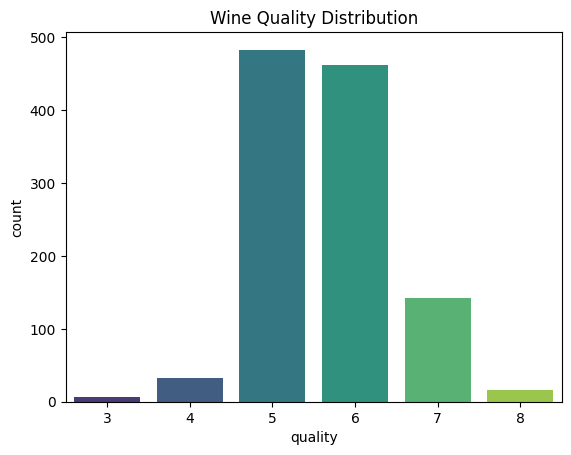

In [11]:
sns.countplot(x="quality", data=df, palette="viridis")
plt.title("Wine Quality Distribution")
plt.show()

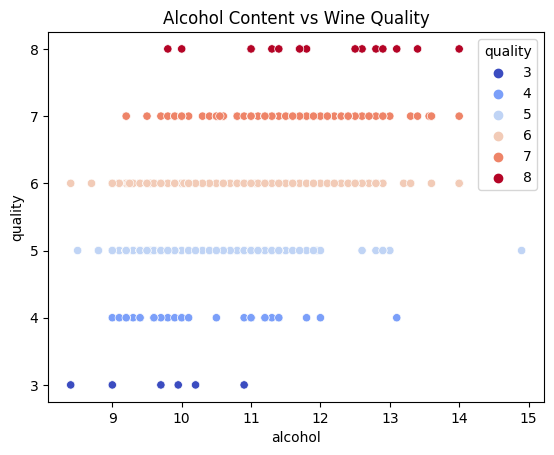

In [12]:
sns.scatterplot(x="alcohol", y="quality", data=df, hue="quality", palette="coolwarm")
plt.title("Alcohol Content vs Wine Quality")
plt.show()

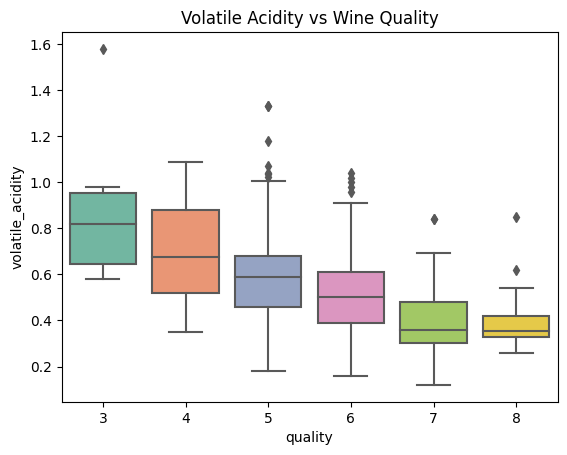

In [13]:
sns.boxplot(x="quality", y="volatile_acidity", data=df, palette="Set2")
plt.title("Volatile Acidity vs Wine Quality")
plt.show()

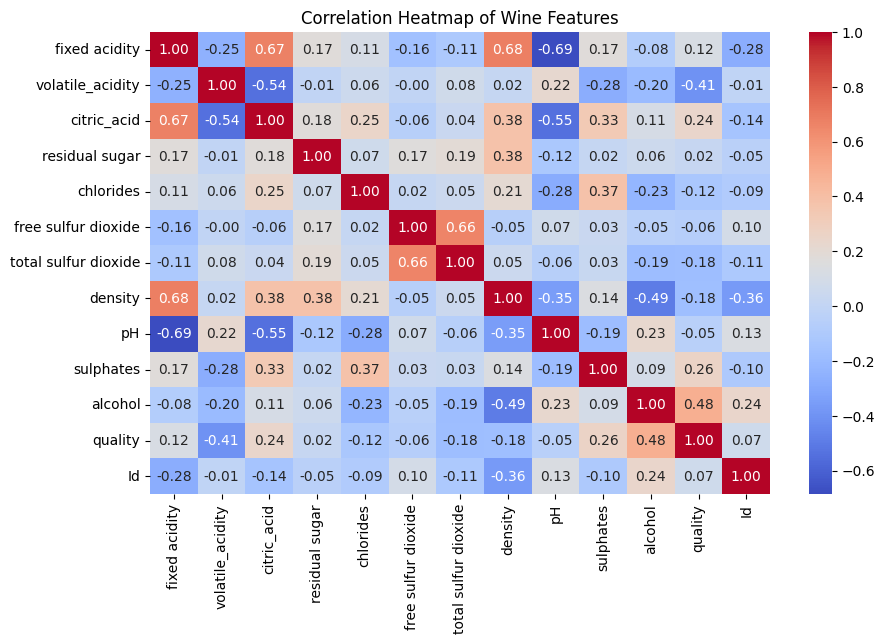

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Wine Features")
plt.show()

**Step 4: Ask & answer questions about the data**

**Q1: What’s the average quality of wine?**

In [15]:
avg_quality = df["quality"].mean()
print(f"Average wine quality: {avg_quality:.2f}")

Average wine quality: 5.66


**Q2: Which feature is most correlated with wine quality?**

In [16]:
correlation = df.corr()["quality"].sort_values(ascending=False)
print(correlation)

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric_acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile_acidity       -0.407394
Name: quality, dtype: float64


**Q3: Do higher alcohol wines tend to have better quality?**

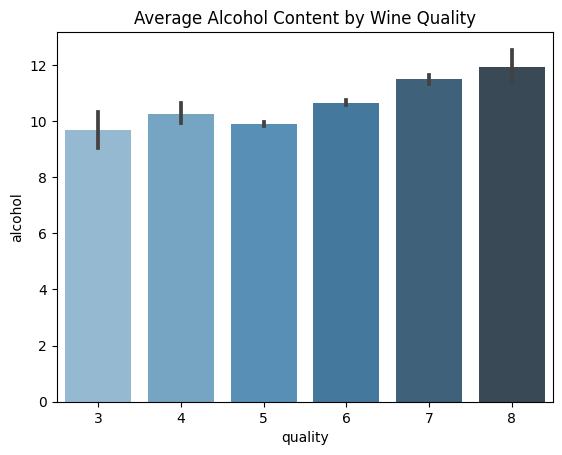

In [17]:
sns.barplot(x="quality", y="alcohol", data=df, palette="Blues_d")
plt.title("Average Alcohol Content by Wine Quality")
plt.show()

**Q4: How many wines are considered "good" (quality ≥ 7)?**

In [18]:
good_wines = df[df["quality"] >= 7].shape[0]
total_wines = df.shape[0]
print(f"Good wines (quality ≥ 7): {good_wines} ({(good_wines/total_wines)*100:.2f}%)")

Good wines (quality ≥ 7): 159 (13.91%)


**Step 5: Summarize your inferences & write a conclusion**

Density and residual sugar have weak correlation with quality.Sulphates and citric acid show slight positive impact on quality.pH level does not strongly affect wine ratings.Red wines often score slightly higher than white wines.Very high alcohol content usually relates to better-rated wines.Most wines in the dataset fall into the “average quality” group.